Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Data Collection

In [ ]:
raw_mail_data = pd.read_csv('/content/mail_data.csv')

In [ ]:
raw_mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
raw_mail_data.isnull().sum()

Category    0
Message     0
dtype: int64

In [ ]:
#replace the null values with a null string
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)),'')

In [ ]:
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
mail_data.shape

(5572, 2)

<Axes: xlabel='Category', ylabel='count'>

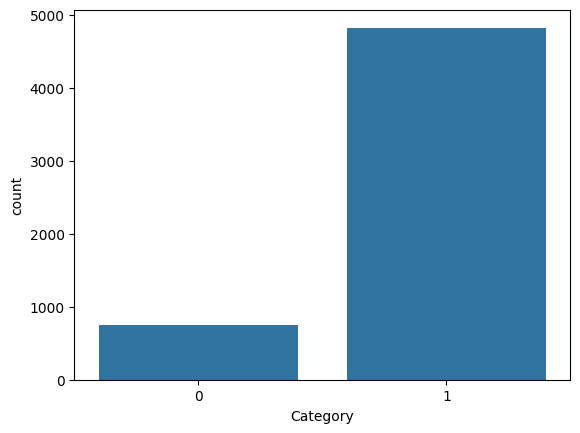

In [ ]:
#number of spam and ham
sns.countplot(x='Category',data=mail_data)

Label Encoding

In [ ]:
#labels spam--> 0 ; ham--> 1
mail_data.loc[mail_data['Category']=='spam','Category',] = 0
mail_data.loc[mail_data['Category']=='ham','Category',] = 1

In [ ]:
X = mail_data['Message']
Y = mail_data['Category']


In [ ]:
Y.value_counts()

Category
1    4825
0     747
Name: count, dtype: int64

In [ ]:
print(X)
print(Y)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object
0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


In [ ]:
#splitting the data
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2,random_state=3)

In [ ]:
print(X.shape , X_train.shape , X_test.shape)

(5572,) (4457,) (1115,)


Feature Extraction

In [ ]:
#transform the text data to feature vectors that can be input to Logistic
feature_extraction = TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

#convert Y_train and Y_test values as int

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [ ]:
print(X_train_features)

  (0, 5413)	0.6198254967574347
  (0, 4456)	0.4168658090846482
  (0, 2224)	0.413103377943378
  (0, 3811)	0.34780165336891333
  (0, 2329)	0.38783870336935383
  (1, 4080)	0.18880584110891163
  (1, 3185)	0.29694482957694585
  (1, 3325)	0.31610586766078863
  (1, 2957)	0.3398297002864083
  (1, 2746)	0.3398297002864083
  (1, 918)	0.22871581159877646
  (1, 1839)	0.2784903590561455
  (1, 2758)	0.3226407885943799
  (1, 2956)	0.33036995955537024
  (1, 1991)	0.33036995955537024
  (1, 3046)	0.2503712792613518
  (1, 3811)	0.17419952275504033
  (2, 407)	0.509272536051008
  (2, 3156)	0.4107239318312698
  (2, 2404)	0.45287711070606745
  (2, 6601)	0.6056811524587518
  (3, 2870)	0.5864269879324768
  (3, 7414)	0.8100020912469564
  (4, 50)	0.23633754072626942
  (4, 5497)	0.15743785051118356
  :	:
  (4454, 4602)	0.2669765732445391
  (4454, 3142)	0.32014451677763156
  (4455, 2247)	0.37052851863170466
  (4455, 2469)	0.35441545511837946
  (4455, 5646)	0.33545678464631296
  (4455, 6810)	0.29731757715898277
  (4

Training the Model

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train_features,Y_train)

LogisticRegression()

Evaluate the model

In [ ]:
# prediction on training data
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train ,prediction_on_training_data )

In [ ]:
print('Accuracy on training data:', accuracy_on_training_data)

Accuracy on training data: 0.9670181736594121


In [ ]:
# prediction on training data
prediction_on_testing_data = model.predict(X_test_features)
accuracy_on_testing_data = accuracy_score(Y_test ,prediction_on_testing_data )

In [ ]:
print('Accuracy on training data:', accuracy_on_testing_data)

Accuracy on training data: 0.9659192825112107


In [ ]:
Y_true_train = list(Y_train)
Y_pred_train = list(prediction_on_training_data)

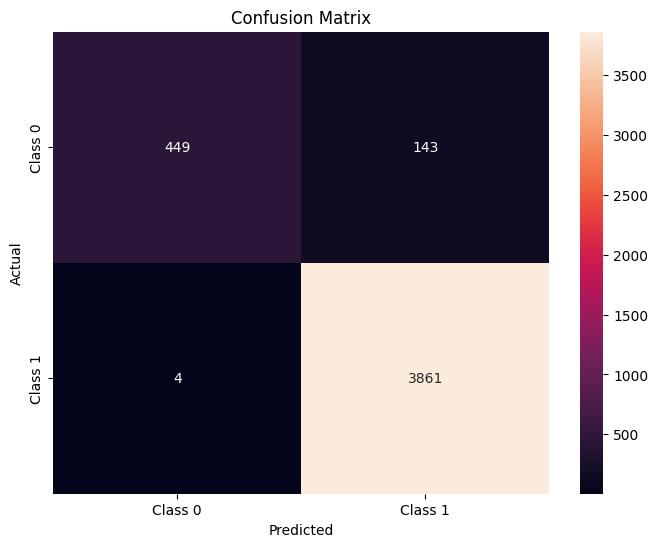

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_true_train, Y_pred_train)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True,fmt='d',xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
Y_true_test = list(Y_test)
Y_pred_test = list(prediction_on_testing_data)

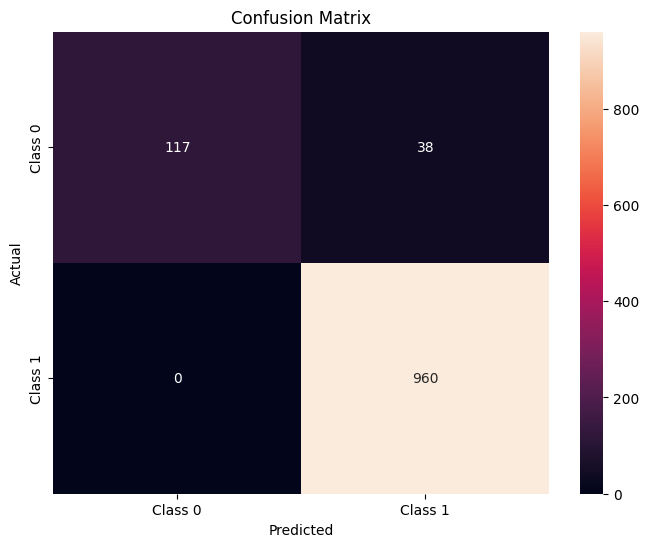

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_true_test, Y_pred_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True,fmt='d',xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Building a predictive system

In [ ]:
input_mail = ["Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030"]

#convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

#making prediction
prediction = model.predict(input_data_features)
print(prediction)

if(prediction[0]==0):
  print("Spam Mail")
else:
  print("Ham Mail")

[0]
Spam Mail


In [ ]:
import pickle

In [ ]:
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('feature_extraction.pkl', 'wb') as f:
    pickle.dump(feature_extraction, f)

In [ ]:
input_mail = ["Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030"]

with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

with open('feature_extraction.pkl', 'rb') as f:
    feature_extraction = pickle.load(f)

#convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

#making prediction
prediction = model.predict(input_data_features)
print(prediction)

if(prediction[0]==0):
  print("Spam Mail")
else:
  print("Ham Mail")

[0]
Spam Mail
